# Task 2: Customer Segmentation

# 1. Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# 2. Load dataset


In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (200, 5)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# 3. Select features for clustering


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 4. Scale features


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Find optimal number of clusters (Elbow Method)


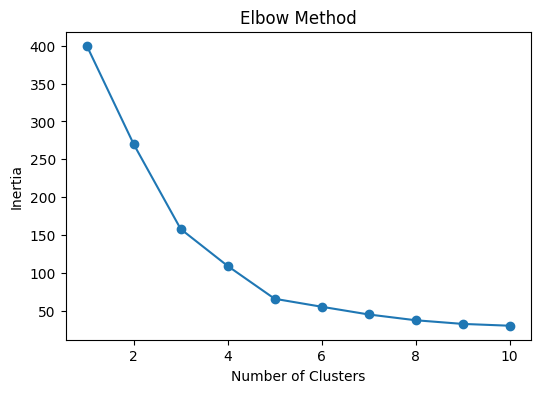

In [ ]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# 6. Apply KMeans (choose k based on elbow, here k=5 as an example)


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Visualize clusters


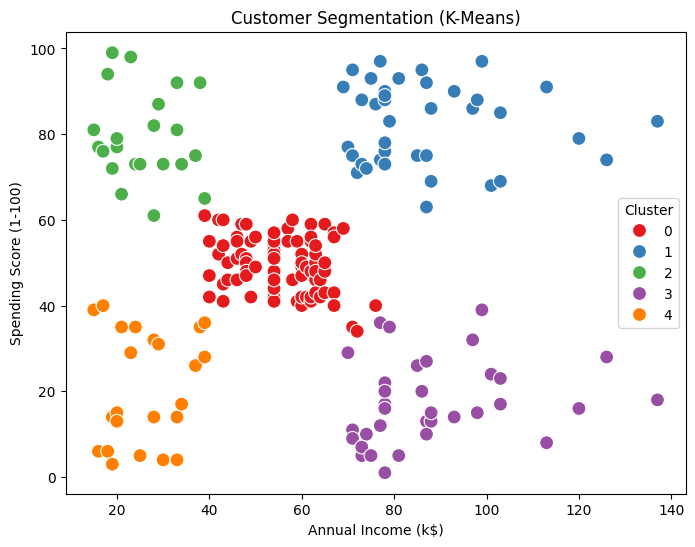

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=100
)
plt.title("Customer Segmentation (K-Means)")
plt.show()

# 8. Average spending per cluster


In [ ]:
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print("\nAverage Spending per Cluster:")
print(avg_spending)


Average Spending per Cluster:
Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


# BONUS: DBSCAN


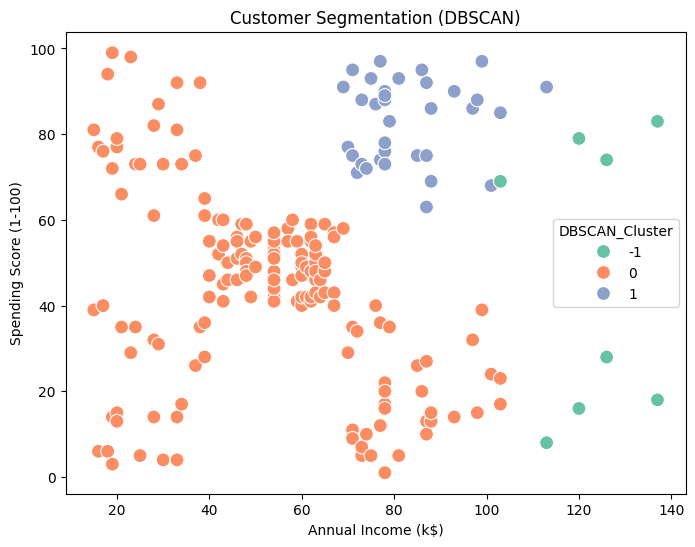

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='Set2',
    s=100
)
plt.title("Customer Segmentation (DBSCAN)")
plt.show()